In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('names/yob2000.txt',names=['name', 'gender', 'number'])

In [4]:
# Task1: Calculate for each name in yob2000.txt its percentage of total births. 
# Store this percentage as an additional column.

In [ ]:
df['percentage'] = ((df['number']) / df['number'].sum()) * 100
print(df)

          name gender  number  percentage
0        Emily      F   25957    0.686806
1       Hannah      F   23085    0.610814
2      Madison      F   19968    0.528341
3       Ashley      F   17997    0.476189
4        Sarah      F   17708    0.468542
...        ...    ...     ...         ...
29771     Zeph      M       5    0.000132
29772    Zeven      M       5    0.000132
29773    Ziggy      M       5    0.000132
29774       Zo      M       5    0.000132
29775    Zyier      M       5    0.000132

[29776 rows x 4 columns]


In [6]:
# Task2: Read all files yob1880.txt, yob1881.txt ... yob2021.txt. 
# Add an extra column for the year. Concatenate them into a single data structure.

In [7]:
import pandas as pd
import glob
files = glob.glob("names/*.txt")

df_l = []
for f in files:
    csv = pd.read_csv(f,names=['name', 'gender', 'number'])
    csv['year'] = f[9:][:4]
    df_l.append(csv)

df_all = pd.concat(df_l, ignore_index=True)

In [8]:
df_all

,name,gender,number,year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17708,2000
...,...,...,...,...
2052776,Zyheem,M,5,2019
2052777,Zykel,M,5,2019
2052778,Zyking,M,5,2019
2052779,Zyn,M,5,2019


In [9]:
# Task3: Calculate the total number of births for each year. 
# Visualize the timeline as a line plot.

In [10]:
num_by_year = pd.DataFrame(df_all.groupby('year')['number'].count())

In [11]:
num_by_year

,number
year,
1880,2000
1881,1934
1882,2127
1883,2084
1884,2297
...,...
2017,32648
2018,32196
2019,32073


<AxesSubplot:xlabel='year'>

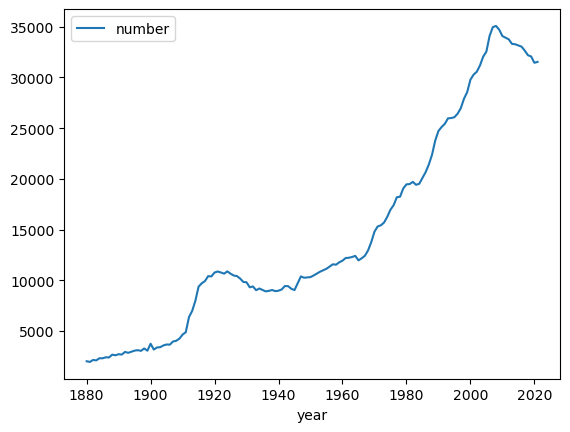

In [12]:
num_by_year.plot()

In [39]:
# Task4: Now, create a timeline for your own name. First check if your name occurs at all. 
# If yes, create a table with the columns year and number.

In [40]:
df_by_name = df_all[df_all['name'] == 'Sarah'].sort_values('year')

In [46]:
sarahName = df_by_name[df_by_name['gender'] == 'F']

<AxesSubplot:xlabel='year'>

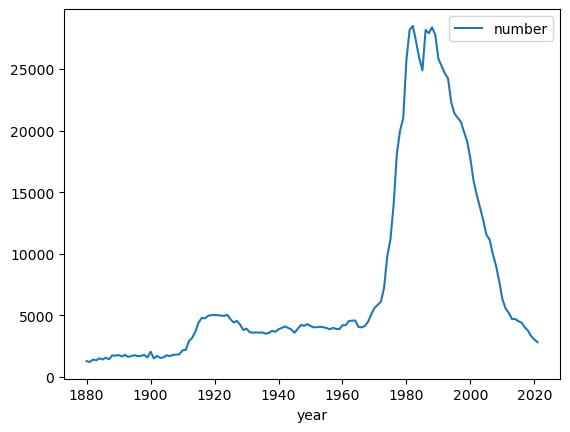

In [49]:
sarahName.plot.line(x='year', y='number')

In [50]:
sarahName.sort_values(by='number')

,name,gender,number,year,year+
1905487,Sarah,F,1226,1881,1881
1903485,Sarah,F,1288,1880,1880
1986269,Sarah,F,1359,1883,1883
1994472,Sarah,F,1410,1882,1882
1854260,Sarah,F,1424,1885,1885
...,...,...,...,...,...
1275848,Sarah,F,27894,1987,1987
1203793,Sarah,F,28162,1986,1986
1560733,Sarah,F,28172,1981,1981
981425,Sarah,F,28370,1988,1988


In [17]:
# Task5: nvestigate the popularity of the names of some US celebrities over the last 130 years. 
# Plot a time line with 2-4 names.

In [18]:
df_populality = df_all[(df_all['name'] == 'Arielle') 
                       | (df_all['name'] == 'Frida') 
                       | (df_all['name'] == 'Leia')]

In [19]:
df_p = df_populality.set_index('year').sort_values('year')
df_p

,name,gender,number
year,,,
1892,Frida,F,5
1895,Frida,F,5
1902,Frida,F,5
1912,Frida,F,5
1913,Frida,F,6
...,...,...,...
2020,Leia,F,1084
2020,Arielle,M,6
2021,Frida,F,264


name
Arielle    AxesSubplot(0.125,0.11;0.775x0.77)
Frida      AxesSubplot(0.125,0.11;0.775x0.77)
Leia       AxesSubplot(0.125,0.11;0.775x0.77)
Name: number, dtype: object

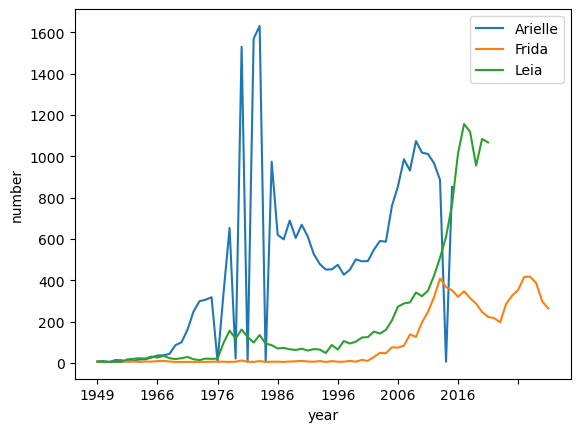

In [27]:
df_p.groupby('name')['number'].plot(
    xlabel='year', ylabel='number', legend=['Arielle', 'Frida', 'Leia'])

In [28]:
# Task6: Finally, we will normalize the data. Repeat Task 4 or 5,
# but divide the count of a given name by the total number of births of that year

In [51]:
sarahName['year+'] = sarahName['year']

/var/folders/6f/d0lh9xg17c5fm7rgjrxrc6t80000gn/T/ipykernel_11636/4059970877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarahName['year+'] = sarahName['year']


In [52]:
dbn = sarahName.set_index('year').sort_values('year')

In [53]:
dbn['percentage'] = dbn['number'] / num_by_year['number']

In [54]:
dbn

,name,gender,number,year+,percentage
year,,,,,
1880,Sarah,F,1288,1880,0.644000
1881,Sarah,F,1226,1881,0.633919
1882,Sarah,F,1410,1882,0.662906
1883,Sarah,F,1359,1883,0.652111
1884,Sarah,F,1518,1884,0.660862
...,...,...,...,...,...
2017,Sarah,F,4031,2017,0.123469
2018,Sarah,F,3767,2018,0.117002
2019,Sarah,F,3311,2019,0.103233


<AxesSubplot:xlabel='year+'>

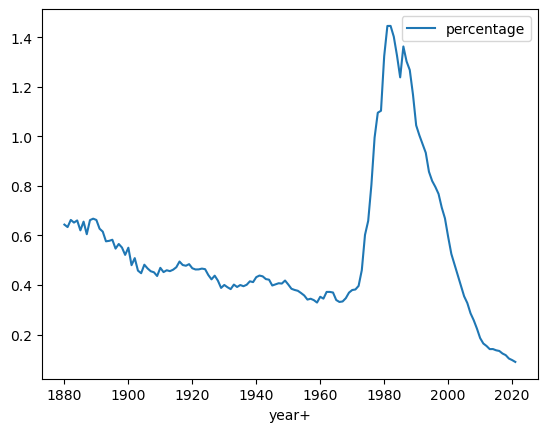

In [55]:
dbn.plot.line(x='year+', y='percentage')

In [202]:
# How does the result change and why is this important?

# In the previous graph, the number of the baby named "Sarah" indecates the laast number in 1880
# ,then gradually growing up its number and hit the peak in around 1984, finally had huge drop after the reaching the peak
# However, if we look at the percentage, it had nearly over 0.6% in 1880 and then the number was going down until 1959,

# The reason we need to look at both the absolute numbers and percentage is that if we looked at just either of them, it could cause misunderstandings